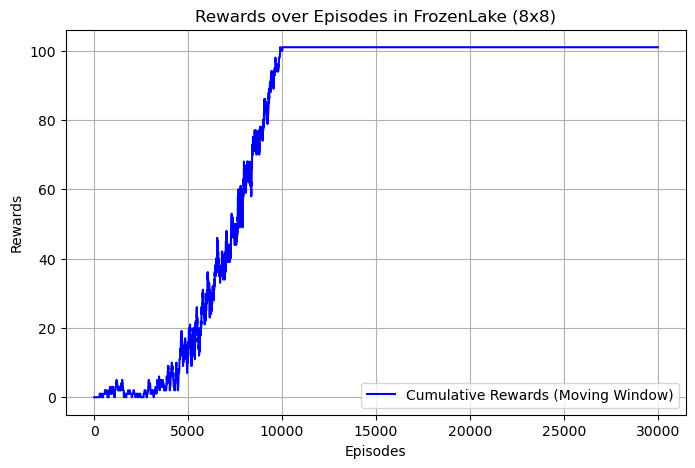


Final Q-Table after Training:
[[0.22876792 0.25418658 0.25418658 0.22876792]
 [0.22876792 0.28242954 0.28242954 0.25418658]
 [0.25418658 0.3138106  0.3138106  0.28242954]
 [0.28242954 0.34867844 0.34867844 0.3138106 ]
 [0.3138106  0.38742049 0.38742049 0.34867844]
 [0.34867844 0.43046721 0.43046721 0.38742049]
 [0.38742049 0.4782969  0.4782969  0.43046721]
 [0.43046721 0.531441   0.4782969  0.4782969 ]
 [0.25418658 0.28242954 0.28242954 0.22876792]
 [0.25418658 0.3138106  0.3138106  0.25418658]
 [0.28242954 0.34867844 0.34867844 0.28242954]
 [0.3138106  0.         0.38742049 0.3138106 ]
 [0.34867844 0.43046721 0.43046721 0.34867844]
 [0.38742049 0.4782969  0.4782969  0.38742049]
 [0.43046721 0.531441   0.531441   0.43046721]
 [0.4782969  0.59049    0.531441   0.4782969 ]
 [0.28242954 0.3138106  0.3138106  0.25418658]
 [0.28242954 0.34867844 0.34867844 0.28242954]
 [0.3138106  0.38742049 0.         0.3138106 ]
 [0.         0.         0.         0.        ]
 [0.         0.4782969  0.478

In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle

def run(episodes, render=False):
    env = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=False, render_mode='human' if render else None)

    q = np.zeros((env.observation_space.n, env.action_space.n))  # Q-table

    learning_rate_a = 0.9
    discount_factor_g = 0.9
    epsilon = 1
    epsilon_decay_rate = 0.0001
    rng = np.random.default_rng()

    rewards_per_episode = np.zeros(episodes)

    for i in range(episodes):
        state = env.reset()[0]
        terminated = False
        truncated = False

        while not terminated and not truncated:
            if rng.random() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q[state, :])

            new_state, reward, terminated, truncated, _ = env.step(action)

            q[state, action] += learning_rate_a * (
                reward + discount_factor_g * np.max(q[new_state, :]) - q[state, action]
            )

            state = new_state

        epsilon = max(epsilon - epsilon_decay_rate, 0)

        if epsilon == 0:
            learning_rate_a = 0.0001

        if reward == 1:
            rewards_per_episode[i] = 1

    env.close()

    
    sum_rewards = np.zeros(episodes)
    for t in range(episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t - 100):(t + 1)])

    plt.figure(figsize=(8, 5))
    plt.plot(sum_rewards, color='b', label="Cumulative Rewards (Moving Window)")
    plt.xlabel('Episodes')
    plt.ylabel('Rewards')
    plt.title('Rewards over Episodes in FrozenLake (8x8)')
    plt.legend()
    plt.grid(True)
    plt.savefig('frozen1_lake8x8.png')
    plt.show()

   
    with open("frozen1_lake8x8.pkl", "wb") as f:
        pickle.dump(q, f)

    
    print("\nFinal Q-Table after Training:")
    print(q)

if __name__ == '__main__':
    
    run(30000)


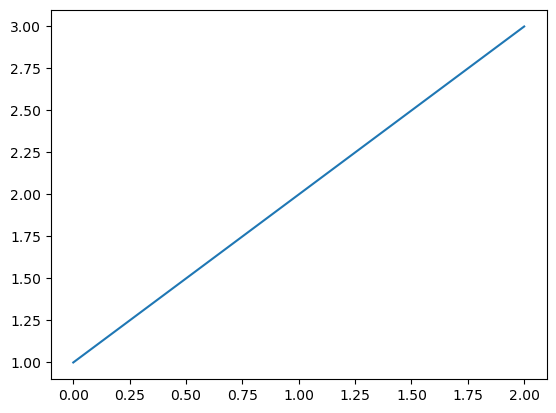

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle

def run(episodes, is_training=True, render=False):

    env = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=False, render_mode='human' if render else None)

    if(is_training):
        q = np.zeros((env.observation_space.n, env.action_space.n)) # init a 64 x 4 array
    else:
        f = open('frozen1_lake8x8.pkl', 'rb')
        q = pickle.load(f)
        f.close()

    learning_rate_a = 0.9 
    discount_factor_g = 0.9 
    epsilon = 1         
    epsilon_decay_rate = 0.0001        
    rng = np.random.default_rng()   

    rewards_per_episode = np.zeros(episodes)

    for i in range(episodes):
        state = env.reset()[0]  
        terminated = False     
        truncated = False       

        while(not terminated and not truncated):
            if is_training and rng.random() < epsilon:
                action = env.action_space.sample() 
            else:
                action = np.argmax(q[state,:])

            new_state,reward,terminated,truncated,_ = env.step(action)

            if is_training:
                q[state,action] = q[state,action] + learning_rate_a * (
                    reward + discount_factor_g * np.max(q[new_state,:]) - q[state,action]
                )

            state = new_state

        epsilon = max(epsilon - epsilon_decay_rate, 0)

        if(epsilon==0):
            learning_rate_a = 0.0001

        if reward == 1:
            rewards_per_episode[i] = 1

    env.close()

    sum_rewards = np.zeros(episodes)
    for t in range(episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
    plt.plot(sum_rewards)
    plt.savefig('frozen1_lake8x8.png')

    if is_training:
        f = open("frozen1_lake8x8.pkl","wb")
        pickle.dump(q, f)
        f.close()

if __name__ == '__main__':
    #run(40000)

    run(3, is_training=False, render=True)